# Importing Packages

In [1]:
import dslab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dslab.visualization.visualize import distributions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

C:\Users\John\anaconda3\envs\term120x_env\python.exe
{'numpy': '1.19.1', 'pandas': '1.0.1', 'seaborn': '0.10.0', 'sklearn': '0.22.1', 'matplotlib': '3.1.3'}


# Setting up data

In [2]:
df = pd.read_csv('FTIR_Spectra_instant_coffee.csv', index_col = 0)
df_trans=df.transpose()
df2=df_trans.rename({'Wavenumbers':'coffee'}, axis=1)
is_arabica=df2['coffee']=='Arabica'

df3=df2.drop(['Group Code:','coffee'], axis=1)
df3.columns=pd.to_numeric(df3.columns.values)
X=df3.apply(pd.to_numeric)


# Seaborn Plot

In [3]:
#Code given by Lecturer

df = pd.read_csv('FTIR_Spectra_instant_coffee.csv')
coffee = df.iloc[1][1:]

X = df.drop([0, 1]).apply(pd.to_numeric)
df2 = X.rename({'Sample Number:': 'wavelength'}, axis=1).set_index('wavelength')

Rvis = df2.transpose()
Rvis['coffee'] = df.iloc[1][1:]

Rvis.index.name = 'sample'

R_melt = pd.melt(Rvis.reset_index(), id_vars=['sample', 'coffee'], value_name='reflectance')
R_melt.head()

,sample,coffee,wavelength,reflectance
0,1,Arabica,810.548,21.227620
1,2,Arabica,810.548,10.364243
2,3,Arabica,810.548,13.118324
3,4,Arabica,810.548,15.668409
4,5,Arabica,810.548,16.634960


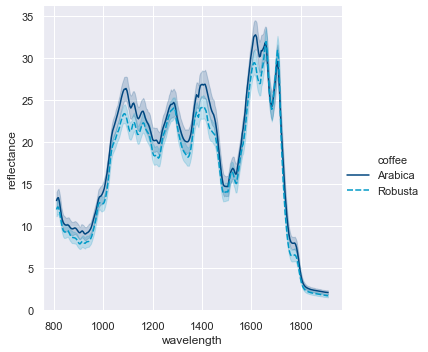

In [4]:
seaplot = sns.relplot(x="wavelength",y="reflectance",hue="coffee", style="coffee", kind="line", data=R_melt)

# Extracting Features

In [5]:
feat = pd.DataFrame()
    
mini = X.min(axis=1)
mean = X.mean(axis=1)
std = X.std(axis=1)
var = X.var(axis=1)
maxi = X.max(axis=1)
feat.insert(loc=0, column='minimum', value=mini)
feat.insert(loc=1, column='mean', value=mean)
feat.insert(loc=2, column='standard deviation', value=std)
feat.insert(loc=3, column='variance', value=var)
feat.insert(loc=4, column='maximum', value=maxi)

ara_feat = feat.iloc[:29,:] #arabica features
rob_feat = feat.iloc[29:,:] #robusta features
rob_feat = rob_feat.reset_index(drop=True)

# Visualize Features

ValueError: x and y must have same first dimension, but have shapes (27,) and (257,)

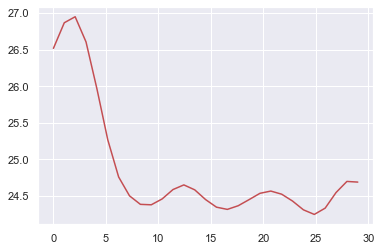

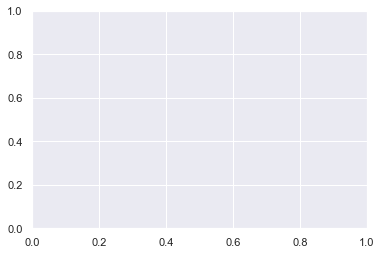

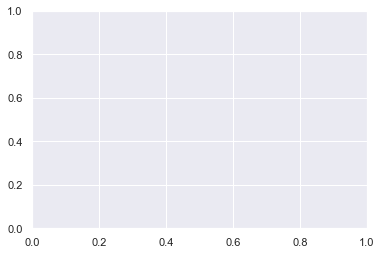

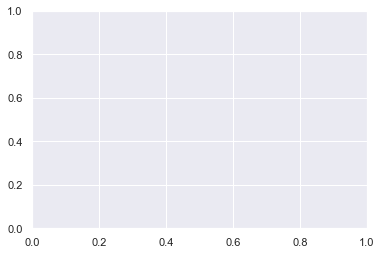

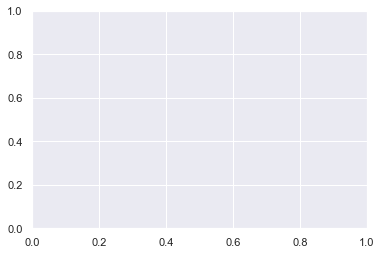

In [6]:
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()

t = np.linspace(0,29,29)
t = np.transpose(t)
t2 = np.linspace(0,27,27)
t2 = np.transpose(t2)
#ax1.plot(y= 'ara_mean')

ax1.plot(t,ara_feat['mean'],'r',label = 'Arabica')
ax1.plot(t2,rob_feat['mean'], 'b',label = 'Robusta')
ax1.legend(loc="upper right")
ax1.set_title('Mean of Arabica and Robusta Coffee Beans (MIR-DRIFT)')
ax1.set_xlabel('Sample Number')

ax2.plot(t,ara_feat['minimum'],'r',label = 'Arabica')
ax2.plot(t2,rob_feat['minimum'], 'b',label = 'Robusta')
ax2.set_title('Minimum of Arabica and Robusta Coffee Beans (MIR-DRIFT)')
ax2.set_xlabel('Sample Number')

ax3.plot(t,ara_feat['maximum'],'r',label = 'Arabica')
ax3.plot(t2,rob_feat['maximum'], 'b',label = 'Robusta')
ax3.set_title('Maximum of Arabica and Robusta Coffee Beans (MIR-DRIFT)')
ax3.set_xlabel('Sample Number')

ax4.plot(t,ara_feat['standard deviation'],'r',label = 'Arabica')
ax4.plot(t2,rob_feat['standard deviation'], 'b',label = 'Robusta')
ax4.set_title('Standard Deviation of Arabica and Robusta Coffee Beans (MIR-DRIFT)')
ax4.set_xlabel('Sample Number')

ax5.plot(t,ara_feat['variance'],'r',label = 'Arabica')
ax5.plot(t2,rob_feat['variance'], 'b',label = 'Robusta')
ax5.set_title('Variance of Arabica and Robusta Coffee Beans (MIR-DRIFT)')
ax5.set_xlabel('Sample Number')



# Distribution Plots

Text(0.5, 0, 'Distribution of Mean')

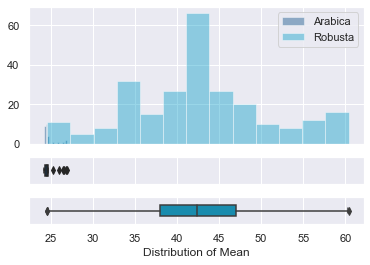

In [7]:
distributions(pd.Series(ara_feat['mean'],name='Arabica'),
              pd.Series(rob_feat['mean'],name='Robusta'),
              both_series=True)
plt.xlabel('Distribution of Mean')

Text(0.5, 0, 'Distribution of Minimum')

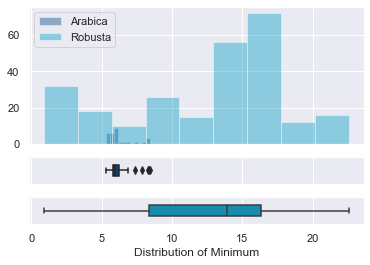

In [8]:
distributions(pd.Series(ara_feat['minimum'],name='Arabica'),
              pd.Series(rob_feat['minimum'],name='Robusta'),
              both_series=True)
plt.xlabel('Distribution of Minimum')

Text(0.5, 0, 'Distribution of Maximum')

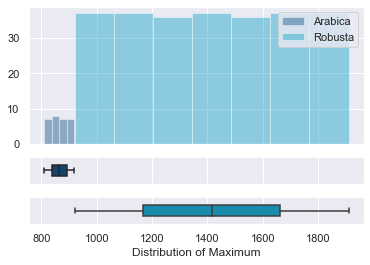

In [9]:
distributions(pd.Series(ara_feat['maximum'],name='Arabica'),
              pd.Series(rob_feat['maximum'],name='Robusta'),
              both_series=True)
plt.xlabel('Distribution of Maximum')

Text(0.5, 0, 'Distribution of Standard Deviation')

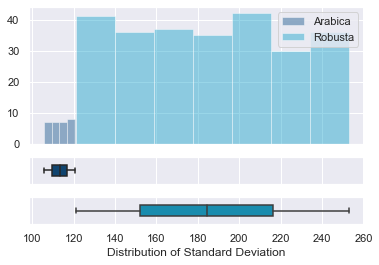

In [10]:
distributions(pd.Series(ara_feat['standard deviation'],name='Arabica'),
              pd.Series(rob_feat['standard deviation'],name='Robusta'),
              both_series=True)
plt.xlabel('Distribution of Standard Deviation')

Text(0.5, 0, 'Distribution of Variance')

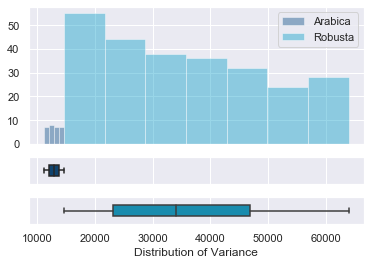

In [11]:
distributions(pd.Series(ara_feat['variance'],name='Arabica'),
              pd.Series(rob_feat['variance'],name='Robusta'),
              both_series=True)
plt.xlabel('Distribution of Variance')

# Confusion Matrix and Accuracy (1 feature)

In [12]:
y_mean_pred = feat['mean'] > 16.7
mean_cm = confusion_matrix(is_arabica, y_mean_pred)
print(mean_cm)
mean_acc = (mean_cm[0][0]+mean_cm[1][1])/(mean_cm[0][0]+mean_cm[0][1]+mean_cm[1][0]+mean_cm[1][1])
print(mean_acc)

ValueError: Found input variables with inconsistent numbers of samples: [56, 286]

In [13]:
y_min_pred = feat['minimum'] > 1.6
min_cm = confusion_matrix(is_arabica, y_min_pred)
print(min_cm)
min_acc = (min_cm[0][0]+min_cm[1][1])/(min_cm[0][0]+min_cm[0][1]+min_cm[1][0]+min_cm[1][1])
print(min_acc)

ValueError: Found input variables with inconsistent numbers of samples: [56, 286]

In [ ]:
y_max_pred = feat['maximum'] > 33
max_cm = confusion_matrix(is_arabica, y_max_pred)
print(max_cm)
max_acc = (max_cm[0][0]+max_cm[1][1])/(max_cm[0][0]+max_cm[0][1]+max_cm[1][0]+max_cm[1][1])
print(max_acc)

In [ ]:
y_std_pred = feat['standard deviation'] > 7
std_cm = confusion_matrix(is_arabica, y_std_pred)
print(std_cm)
std_acc = (std_cm[0][0]+std_cm[1][1])/(std_cm[0][0]+std_cm[0][1]+std_cm[1][0]+std_cm[1][1])
print(std_acc)

In [ ]:
y_var_pred = feat['variance'] > 76
var_cm = confusion_matrix(is_arabica, y_var_pred)
print(var_cm)
var_acc = (var_cm[0][0]+var_cm[1][1])/(var_cm[0][0]+var_cm[0][1]+var_cm[1][0]+var_cm[1][1])
print(var_acc)

# Confusion Matrix and Accuracy (2 features)

In [14]:
y_pred = feat['minimum'] > 1.7
y_pred = pd.to_numeric(y_pred.values)
y2_pred =feat['mean'] > 16.4
y2_pred = pd.to_numeric(y2_pred.values)
y_comb = []
for i in range(len(y_pred)):
    if y_pred[i] ==True and y2_pred[i] == True:
        y_comb.append(True)
    else:
        y_comb.append(False)
           
comb_cm = confusion_matrix(is_arabica, y_comb)
print(comb_cm)
comb_acc = (comb_cm[0][0]+comb_cm[1][1])/(comb_cm[0][0]+comb_cm[0][1]+comb_cm[1][0]+comb_cm[1][1])
print(comb_acc)

ValueError: Found input variables with inconsistent numbers of samples: [56, 286]